In [17]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error 
from math import sqrt 

In [18]:
df_transfer_clean = pd.read_csv('Transfermarkt_Clean.csv')
df_transfer_clean = df_transfer_clean[df_transfer_clean['fee']<200000]
df = df_transfer_clean[['Market_Value_in_K', 'fee']].dropna(how = 'any' )
x = df.Market_Value_in_K
y = df.fee
x_model = x.values.reshape(-1,1)
y_model = y.values.reshape(-1,1)

In [19]:
def model_reg(X,y):    
    lr = linear_model.LinearRegression()
    scores = cross_val_score(lr, X, y, cv= KFold(5, True))
    predicted = cross_val_predict(lr, X, y, cv=5)
    return scores, predicted


def plot_reg(predicted, y):
    fig, ax = plt.subplots()
    ax.scatter(y, predicted, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Market Value')
    ax.set_ylabel('Actual Transfer Fees')
    plt.show()
    return 

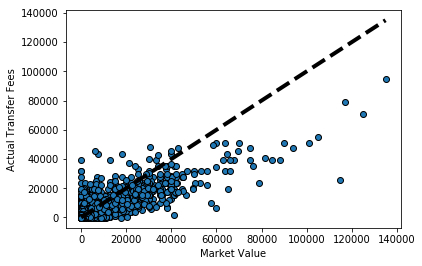

Cross validadted r-square scores: [0.70417663 0.62559352 0.72618885 0.7538848  0.69523157]
Root-mean-squared error: 2889.7761738567897


In [20]:
(scores, predicted) = model_reg(x_model,y_model)
rms = sqrt(mean_squared_error(y_model, predicted))
plot_reg(predicted,y_model)
print('Cross validadted r-square scores: {}'.format(scores))
print('Root-mean-squared error: {}'.format(rms))

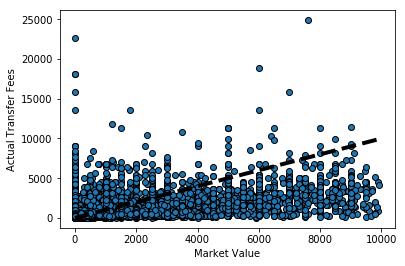

Cross validadted r-square scores: [0.33019398 0.35447775 0.28261692 0.37687582 0.32615181]
Root-mean-squared error: 1325.986313903394


In [23]:
df_small = df_transfer_clean[df_transfer_clean['fee']<10000]

df = df_small[['Market_Value_in_K', 'fee']].dropna(how = 'any' )
x = df.Market_Value_in_K
y = df.fee
x_model = x.values.reshape(-1,1)
y_model = y.values.reshape(-1,1)

(scores, predicted) = model_reg(x_model,y_model)
rms = sqrt(mean_squared_error(y_model, predicted))
plot_reg(predicted,y_model)
print('Cross validadted r-square scores: {}'.format(scores))
print('Root-mean-squared error: {}'.format(rms))